In [ ]:
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

DATADIR = "/content/images/train"
CATEGORIES = ["dog", "cat"]
IMG_SIZE = 100

data = []

# Load and preprocess
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    label = CATEGORIES.index(category)

    for img in tqdm(os.listdir(path)[:500]):  # Use only 500 per class to save time
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            data.append([resized.flatten(), label])
        except Exception as e:
            pass

# Separate features and labels
X = np.array([i[0] for i in data])
y = np.array([i[1] for i in data])

100%|██████████| 17/17 [00:00<00:00, 175.53it/s]


In [ ]:
# Normalize
X = X / 255.0

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM
model = SVC(kernel='linear', probability=True)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


Classification Report:
               precision    recall  f1-score   support

         dog       0.25      0.50      0.33         2
         cat       0.67      0.40      0.50         5

    accuracy                           0.43         7
   macro avg       0.46      0.45      0.42         7
weighted avg       0.55      0.43      0.45         7



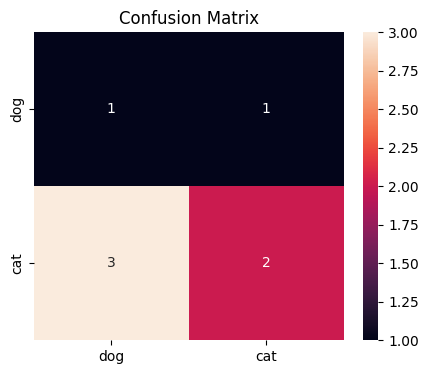

In [ ]:
# Accuracy report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=CATEGORIES))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.title("Confusion Matrix")
plt.show()


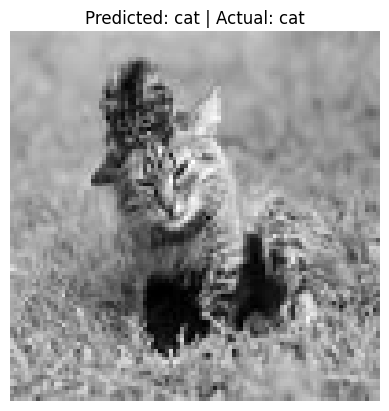

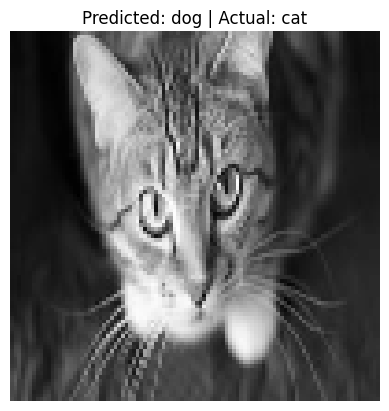

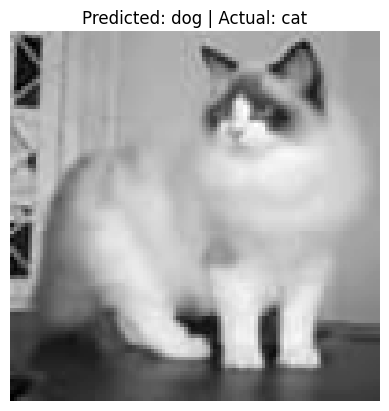

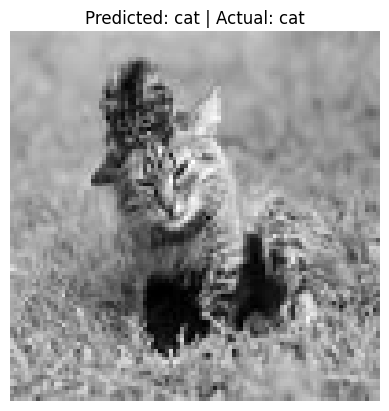

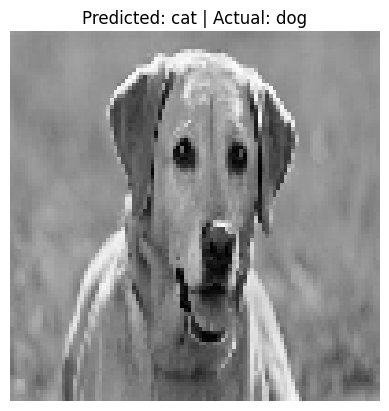

In [ ]:
# Visual predictions
for i in range(5):
    idx = np.random.randint(0, len(X_test))
    img = X_test[idx].reshape(IMG_SIZE, IMG_SIZE)
    actual = CATEGORIES[y_test[idx]]
    pred = CATEGORIES[model.predict([X_test[idx]])[0]]

    plt.imshow(img, cmap="gray")
    plt.title(f"Predicted: {pred} | Actual: {actual}")
    plt.axis('off')
    plt.show()


In [ ]:
import joblib
joblib.dump(model, "dog_cat_svm_model.pkl")


['dog_cat_svm_model.pkl']